## PyTorch Resnets

In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)
pd.set_option('display.max_rows', 50)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [24]:
series = 1
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "yolo" # change yolo - resnet-human
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [25]:
results.columns

Index(['experiment_id', 'client_to_model_avg', 'client_to_model_p99',
       'client_to_model_p95', 'client_to_model_p50', 'client_to_model_var',
       'client_to_model_max', 'client_to_model_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p95', 'model_latencies_p50',
       'model_latencies_var', 'model_latencies_max', 'model_latencies_min',
       'model_to_client_avg', 'model_to_client_p99', 'model_to_client_p95',
       'model_to_client_p50', 'model_to_client_var', 'model_to_client_max',
       'model_to_client_min', 'e2e_latencies_avg', 'e2e_latencies_p99',
       'e2e_latencies_p95', 'e2e_latencies_p50', 'e2e_latencies_var',
       'e2e_latencies_max', 'e2e_latencies_min', 'start_time', 'end_time',
       'duration', 'timeout_count', 'cpu_usage_count_avg',
       'cpu_usage_count_p99', 'cpu_usage_count_p95', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p

In [26]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 2.yaml
{   'benchmark_duration': 1,
    'central_queue': False,
    'cpu_request': ['4', '8', '16'],
    'data_type': 'image',
    'distrpution_time': 10,
    'logs_enabled': False,
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['2Gi'],
    'mode': 'exponential',
    'model_variants': ['yolov5s'],
    'node_name': 'yolo',
    'num_interop_threads': ['1'],
    'num_threads': ['1'],
    'only_pod': True,
    'pipeline_name': 'video',
    'repetition': 1,
    'replicas': [1],
    'series': 1,
    'series_meta': 'yolov5x intra = 1, inter = int(cpu)',
    'sla': 1,
    'timeout': 100,
    'use_threading': 'True',
    'workload_config': {'load_duration': 60, 'loads_to_test': [16]},
    'workload_type': 'static'}
File name: 0.yaml
{   'benchmark_duration': 1,
    'central_queue': False,
    'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'image',
    'distrpution_time': 10,
    'logs_enabled': False,
    'max_batch_

In [27]:
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine,mode,data_type,benchmark_duration
0,1,video,yolo,yolov5s,1,2Gi,1,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
1,2,video,yolo,yolov5s,2,2Gi,1,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
2,3,video,yolo,yolov5s,4,2Gi,1,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
3,4,video,yolo,yolov5s,8,2Gi,1,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
4,5,video,yolo,yolov5s,16,2Gi,1,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
5,6,video,yolo,yolov5s,1,2Gi,2,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
6,7,video,yolo,yolov5s,2,2Gi,2,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
7,8,video,yolo,yolov5s,4,2Gi,2,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
8,9,video,yolo,yolov5s,8,2Gi,2,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1
9,10,video,yolo,yolov5s,16,2Gi,2,1,16,60,1,"yolov5x intra = 1, inter = int(cpu)",1,False,exponential,image,1


In [28]:
# experiment_ids = key_config_df["experiment_id"].tolist()
    # (key_config_df["model_variant"] == "resnet18") & (key_config_df["cpu_request"] == 2.2)
experiment_ids = key_config_df[(key_config_df["model_variant"] == "yolov5s") & (key_config_df["max_batch_size"] < 16)]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = [
    "model_latencies_min",
    "model_latencies_p95",
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "throughput_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)

# output["expected_throughput"] = (
#     1 / output["model_latencies_avg"] * output["max_batch_size"]
# )
# output.sort_values(by='throughput')
display(output)

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
0,yolov5s,1,1,16,0.123668,0.144277,0.151573,332.441004,0.133170,0.000000
1,yolov5s,1,2,16,0.084890,0.112208,0.117918,64.425187,0.103450,9.470000
2,yolov5s,1,4,16,0.052667,0.068668,0.075657,140.016814,0.062549,9.566667
3,yolov5s,1,8,16,0.043855,0.054400,0.057431,139.936312,0.047719,2.334969
4,yolov5s,1,16,16,0.033453,0.049116,0.053079,216.045027,0.042193,4.577991
5,yolov5s,2,1,16,0.247660,0.274876,0.288261,330.824156,0.259320,7.696786
6,yolov5s,2,2,16,0.134948,0.178467,0.193577,106.095050,0.164277,11.873418
7,yolov5s,2,4,16,0.092482,0.124290,0.137768,63.417335,0.114505,12.135593
8,yolov5s,2,8,16,0.061912,0.088277,0.100327,92.259282,0.078307,3.504600
9,yolov5s,2,16,16,0.053602,0.070787,0.080092,91.665201,0.062213,16.000000


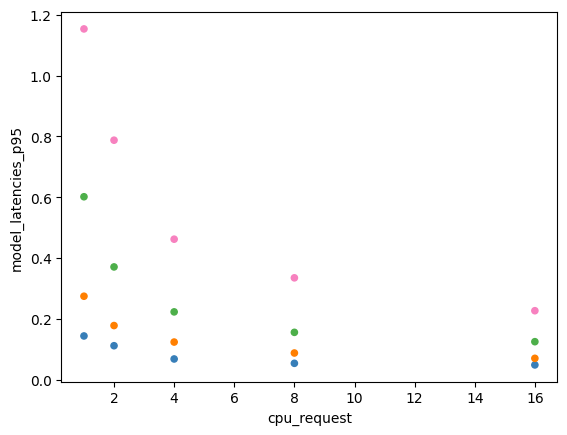

In [29]:
color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

ax = output.plot.scatter(
    x="cpu_request", y="model_latencies_p95", c=output['max_batch_size'].map({1:color[0], 2:color[1], 4:color[2], 8:color[3], 16:color[4], 32:color[5]}), style="o-"
)


In [30]:
display(output[output['cpu_request']==1])

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
0,yolov5s,1,1,16,0.123668,0.144277,0.151573,332.441004,0.133170,0.000000
5,yolov5s,2,1,16,0.247660,0.274876,0.288261,330.824156,0.259320,7.696786
10,yolov5s,4,1,16,0.270779,0.601764,0.606386,60.672486,0.550175,6.976648
15,yolov5s,8,1,16,0.241854,1.153289,1.275413,217.052518,0.690559,6.976677


In [31]:
print(output['model_latencies_p99'].to_list())

[0.15157279968261717, 0.1179177188873291, 0.07565650701522826, 0.057431175708770744, 0.05307869195938109, 0.2882609987258911, 0.19357667684555033, 0.13776758432388303, 0.10032715320587149, 0.08009190082550048, 0.6063861846923828, 0.38225746154785156, 0.2341001033782959, 0.18036556243896484, 0.1452624797821045, 1.2754130363464355, 0.8355793952941895, 0.501737117767334, 0.3528733253479004, 0.2628786563873291]
